In [1]:
#加载所必要的库：numpy数值处理工具,matplotlib作图工具，skimage图像处理工具
import numpy as np
import matplotlib.pyplot as plt
import skimage

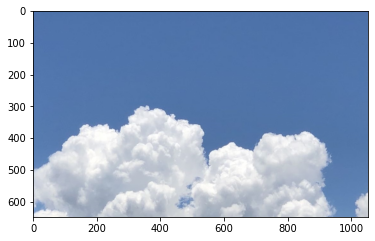

In [2]:
#载入文件夹中预设好的图片,但是需要先手动载入skimage读图的子模块
import skimage.io as io
img=io.imread("data/4.jpg")

#展示图片
plt.imshow(img)

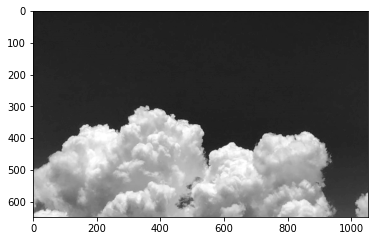

In [3]:
#图片平滑滤波-高斯滤波
#首先需要将图片转化成灰白图片
img_gray=skimage.color.rgb2gray(img)

#如果展示灰白图而不是亮度图
plt.imshow(img_gray,plt.cm.gray)

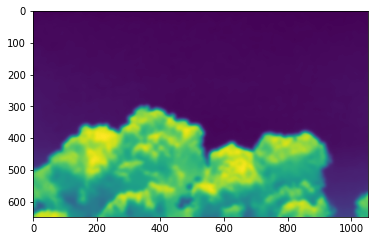

In [4]:
#手动加载SKIMAGE中用于高斯平滑滤波的子模块

import skimage.filters as filters

#直接调用gaussian模块，可以尝试不同的sigma=1,3,10感受效果

img_e=filters.gaussian(img_gray,sigma=5)
plt.imshow(img_e)

In [5]:
#边缘检测滤波
#载入关键的库 filters feature
from skimage import filters
from skimage import feature

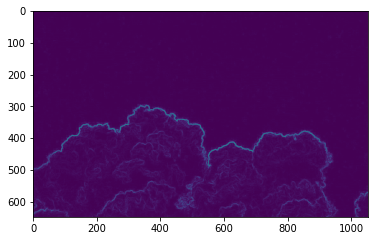

In [6]:
#使用robert算子进行滤波
img_e=filters.roberts(img_gray)
plt.imshow(img_e)

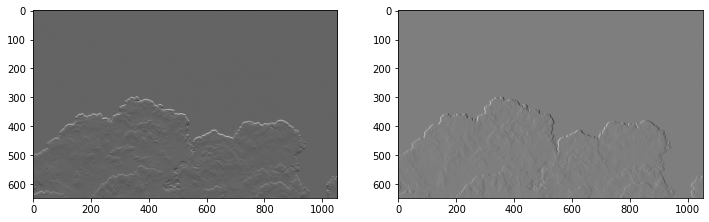

In [8]:
#使用 prewitt算子中独立的水平和垂直算子进行滤波

#水平算子检测
img_e1=filters.prewitt_h(img_gray)
#垂直算子检测
img_e2=filters.prewitt_v(img_gray)

#检测结果展示

plt.figure("prewitt",figsize=(12,12))
plt.subplot(121)
plt.imshow(img_e1,plt.cm.gray)
plt.subplot(122)
plt.imshow(img_e2,plt.cm.gray)
plt.show()

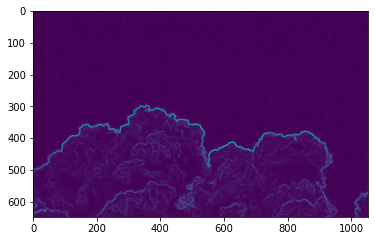

In [9]:
#使用 prewitt算子进行滤波
img_e=filters.prewitt(img_gray)
plt.imshow(img_e)

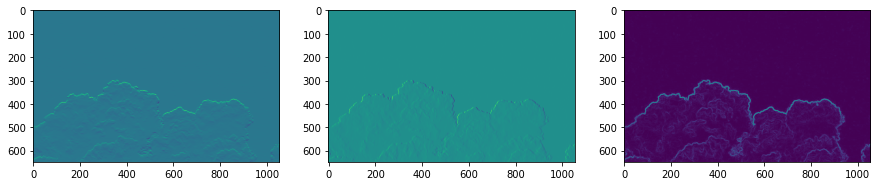

In [11]:
#使用sobel的三种算子进行检测

#水平算子
img_e1=filters.sobel_h(img_gray)
#垂直算子
img_e2=filters.sobel_v(img_gray)
#sobel算子
img_e3=filters.sobel(img_gray)
#结果展示

plt.figure("sobel",figsize=(15,15))
plt.subplot(131)
plt.imshow(img_e1)
plt.subplot(132)
plt.imshow(img_e2)
plt.subplot(133)
plt.imshow(img_e3)
plt.show()


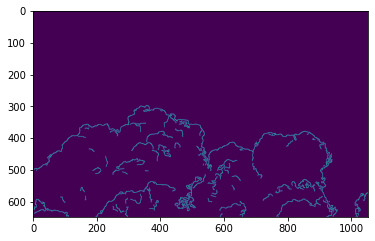

In [14]:
#使用canny算子进行检测
import skimage.feature as feature
img_e=feature.canny(img_gray,sigma=1)
plt.imshow(img_e)

In [ ]:
#基于阈值的图片分割

In [15]:
#采用otsu算法计算分割阈值,测试不同nbins效果
theta=filters.threshold_otsu(img_gray,nbins=256)
print(theta)

0.6374439966299019


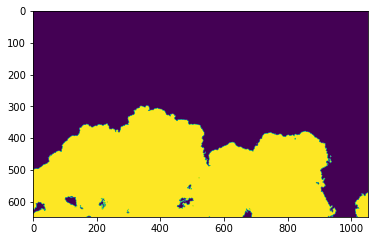

In [16]:
#通过阈值生成分割的图片
img_seg=np.zeros(img_gray.shape)
img_seg[img_gray>theta]=1
#展示图片
plt.imshow(img_seg)

theta1:  0.5149076470588236
theta2:  0.6374439966299019


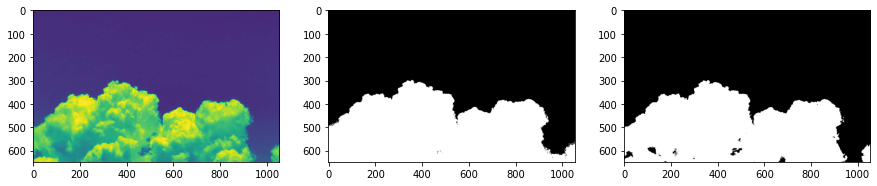

In [19]:
#展示不同BINS带来的区别
theta=filters.threshold_otsu(img_gray,nbins=2)
img_seg1=np.zeros(img.shape)
img_seg1[img_gray>theta]=1
print("theta1: ",theta)
theta = filters.threshold_otsu(img_gray,nbins=256) #返回一个阈值
print("theta2: ",theta)
img_seg2=np.zeros(img.shape)
img_seg2[img_gray>theta]=1

plt.figure('segmented_img',figsize=(15,15))
plt.subplot(131)
plt.imshow(img_gray) 
plt.subplot(132)
plt.imshow(img_seg1)
plt.subplot(133)
plt.imshow(img_seg2)
plt.show()

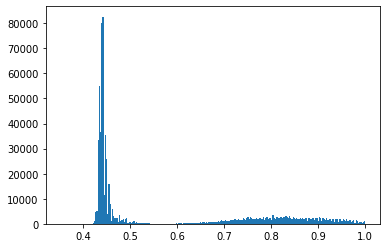

In [20]:
#观看一下灰度的实际分布，偏低的峰是背景天空，另外一个较亮的云
hist_data=img_gray.flatten()
#print(hist_data.shape)
n,bins,patches=plt.hist(hist_data,bins=256)
plt.show()

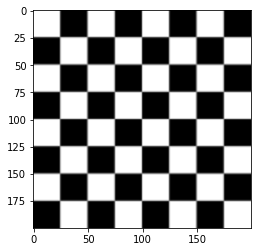

In [21]:
#基本形态学滤波，载入必要的模块和图片
from skimage import morphology
from skimage import data
img=data.checkerboard()
plt.imshow(img,plt.cm.gray)

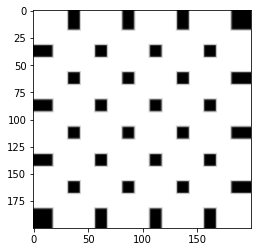

In [25]:
#膨胀
img_d=morphology.dilation(img,morphology.square(15))
plt.imshow(img_d,plt.cm.gray)

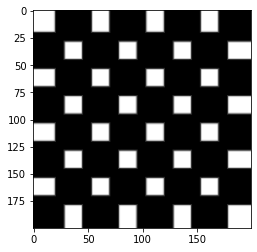

In [27]:
#腐蚀
img_d=morphology.erosion(img,morphology.square(10))
plt.imshow(img_d,plt.cm.gray)

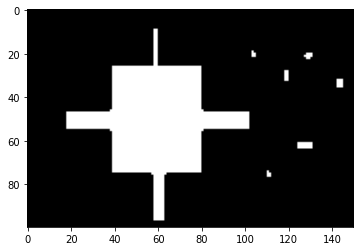

In [29]:
#载入一张特别的图片方便理解
img=io.imread("data/5.jpg")
from skimage import transform
img=transform.resize(img,[100,150])

#清理一下，把图片二值化
img_gray=skimage.color.rgb2gray(img)
img_gray[img_gray>0.5]=1
img_gray[img_gray<0.5]=0

plt.imshow(img_gray,plt.cm.gray)


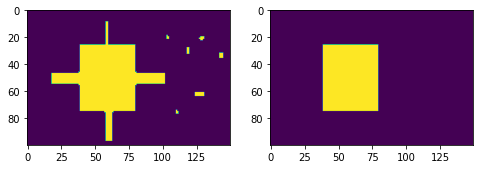

In [30]:
#开运算，先腐蚀再膨胀，可以消除小物体小斑块
img_d=morphology.erosion(img_gray,morphology.square(25))
img_d=morphology.dilation(img_d,morphology.square(25))

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.imshow(img_gray)
plt.subplot(122)
plt.imshow(img_d)

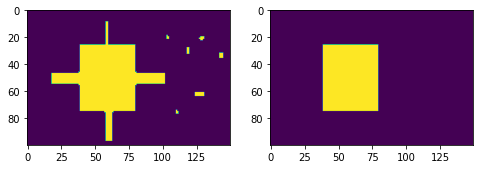

In [31]:
#开运算，先腐蚀再膨胀，可以消除小物体小斑块：直接调用模组，尝试不同的范围阈值
img_d=morphology.opening(img_gray,morphology.square(25))

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.imshow(img_gray)
plt.subplot(122)
plt.imshow(img_d)

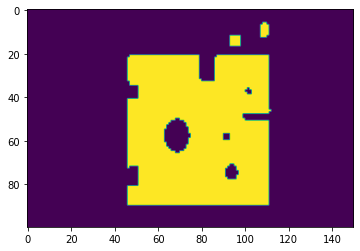

In [32]:
#闭运算，先膨胀再腐蚀，可以来填充孔洞，载入特别图片方便理解
img=io.imread("data/6.jpg")

img=transform.resize(img,[100,150])
#清理一下，把图片二值化
img_gray=skimage.color.rgb2gray(img)
img_gray[img_gray>0.5]=1
img_gray[img_gray<0.5]=0

plt.imshow(img_gray)

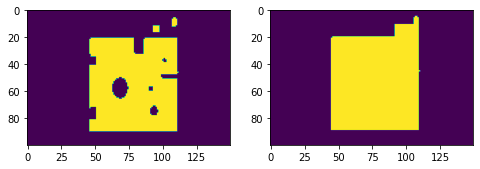

In [33]:
#分开两步实现
img_d=morphology.dilation(img_gray,morphology.square(10))
img_d=morphology.erosion(img_d,morphology.square(10))

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.imshow(img_gray)
plt.subplot(122)
plt.imshow(img_d)

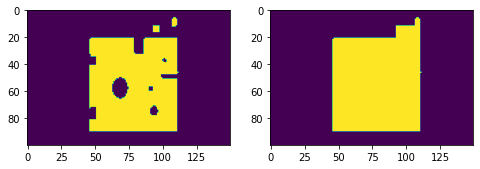

In [34]:
#一步调用模块实现，尝试不同的范围阈值
img_d=morphology.closing(img_gray,morphology.square(10))

plt.figure('morphology',figsize=(8,8))
plt.subplot(121)
plt.imshow(img_gray)
plt.subplot(122)
plt.imshow(img_d)